In [33]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
import catboost as cb

In [34]:
data1 = pd.read_csv('taiwan_data.csv')

In [35]:
data1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [36]:
print(data1.groupby('default payment next month').size())

default payment next month
0    23364
1     6636
dtype: int64


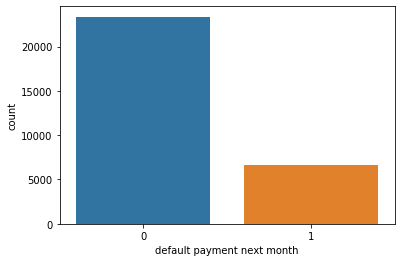

In [37]:
sns.countplot(data1['default payment next month'],label="Count")
plt.show()

#### On remarque un desequilbre entre les classes(Yes(1), No(0))

In [38]:
23364/(23364+6636)

0.7788

#### Diviser les données en données d'apprentissage et données de test 

In [39]:
y = data1.iloc[:,-1]   # Enregistrer la varialbe target
x = data1.iloc[:,0:-1]; # Enleveer la colonne target

In [40]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state = 1)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Classification Algorithms

In [43]:
Models_results=pd.DataFrame()

###  K-Nearest Neighbors

Text(0, 0.5, 'Erreur')

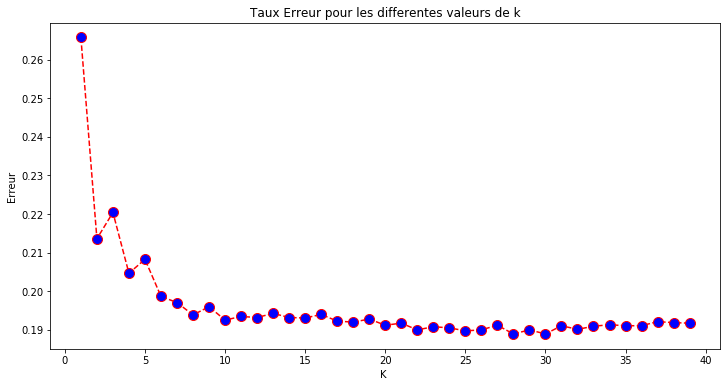

In [44]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [14]:
#Best k is 28

In [45]:
def K_Nearest_Neighbors(Models_results,k):
    knn = KNeighborsClassifier(k)
    knn_model=knn.fit(X_train, y_train)
    y_pred_knn =knn_model.predict(X_test)
    print(knn_model,'\n')
    print(confusion_matrix(y_test, y_pred_knn))
    print(classification_report(y_test,y_pred_knn))
    roc=roc_auc_score(y_test, y_pred_knn)
    acc = accuracy_score(y_test,y_pred_knn)
    prec = precision_score(y_test, y_pred_knn)
    rec = recall_score(y_test,y_pred_knn)
    f1 = f1_score(y_test, y_pred_knn)
    model =  pd.DataFrame([['K Nearest Neighbors', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
    print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
    return M

In [46]:
Models_results=K_Nearest_Neighbors(Models_results,28)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform') 

[[5550  282]
 [1135  533]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5832
           1       0.65      0.32      0.43      1668

    accuracy                           0.81      7500
   macro avg       0.74      0.64      0.66      7500
weighted avg       0.79      0.81      0.79      7500

Accuracy of KNN classifier on training set: 0.82
Accuracy of KNN classifier on test set: 0.81


### CART

In [47]:
def Cart(Models_results):
    dtc = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
    dtc_model=dtc.fit(X_train, y_train)
    y_pred_dtc = dtc_model.predict(X_test)
    print(dtc_model,'\n')
    print(confusion_matrix(y_test, y_pred_dtc))
    print(classification_report(y_test,y_pred_dtc))
    roc=roc_auc_score(y_test, y_pred_dtc)
    acc = accuracy_score(y_test,y_pred_dtc)
    prec = precision_score(y_test, y_pred_dtc)
    rec = recall_score(y_test,y_pred_dtc)
    f1 = f1_score(y_test, y_pred_dtc)
    model =  pd.DataFrame([['Classification and Regression Trees', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of CART classifier on training set: {:.2f}'.format(dtc.score(X_train, y_train)))
    print('Accuracy of CART classifier on test set: {:.2f}'.format(dtc.score(X_test, y_test)))
    return M

In [48]:
Models_results=Cart(Models_results)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best') 

[[4601 1231]
 [1026  642]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      5832
           1       0.34      0.38      0.36      1668

    accuracy                           0.70      7500
   macro avg       0.58      0.59      0.58      7500
weighted avg       0.71      0.70      0.71      7500

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.70


### Random Forest

In [49]:
def Random_Forest(Models_results):    
    rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state=0)
    rfc_model = rfc.fit(X_train, y_train)
    y_pred_rfc = rfc_model.predict(X_test)
    print(rfc_model,'\n')
    print(confusion_matrix(y_test, y_pred_rfc))
    print(classification_report(y_test,y_pred_rfc))
    roc=roc_auc_score(y_test,y_pred_rfc)
    acc = accuracy_score(y_test,y_pred_rfc)
    prec = precision_score(y_test, y_pred_rfc)
    rec = recall_score(y_test,y_pred_rfc)
    f1 = f1_score(y_test,y_pred_rfc)
    model =  pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rfc.score(X_train, y_train)))
    print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))
    return M

In [50]:
Models_results=Random_Forest(Models_results)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False) 

[[5633  199]
 [1217  451]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5832
           1       0.69      0.27      0.39      1668

    accuracy                           0.81      7500
   macro avg       0.76      0.62      0.64      7500
weighted avg       0.79      0.81      0.78      7500

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.81


### Stochastic Gradient descent

In [51]:
def Stochastic_Gradient_Descent(Models_results):    
    sgd = SGDClassifier()
    sgd_model=sgd.fit(X_train, y_train)
    y_pred_stochastic_gradient_descent = sgd_model.predict(X_test)
    print(sgd_model,'\n')
    print(confusion_matrix(y_test,y_pred_stochastic_gradient_descent))
    print(classification_report(y_test,y_pred_stochastic_gradient_descent))
    roc=roc_auc_score(y_test,y_pred_stochastic_gradient_descent)
    acc = accuracy_score(y_test,y_pred_stochastic_gradient_descent)
    prec = precision_score(y_test,y_pred_stochastic_gradient_descent)
    rec = recall_score(y_test,y_pred_stochastic_gradient_descent)
    f1 = f1_score(y_test,y_pred_stochastic_gradient_descent)
    model =  pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Stochastic Gradient Descent classifier on training set: {:.2f}'.format(sgd.score(X_train, y_train)))
    print('Accuracy of Stochastic Gradient Descent classifier on test set: {:.2f}'.format(sgd.score(X_test, y_test)))
    return M

In [52]:
Models_results=Stochastic_Gradient_Descent(Models_results)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) 

[[5539  293]
 [1077  591]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5832
           1       0.67      0.35      0.46      1668

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500

Accuracy of Stochastic Gradient Descent classifier on training set: 0.81
Accuracy of Stochastic Gradient Descent classifier on test set: 0.82


### SVM

In [53]:
def Support_Vector_Machine(Models_results):    
    scv = SVC()
    svc_model=scv.fit(X_train, y_train)
    y_pred_svm = svc_model.predict(X_test)
    print(svc_model,'\n')
    print(confusion_matrix(y_test,y_pred_svm))
    print(classification_report(y_test,y_pred_svm))
    roc=roc_auc_score(y_test,y_pred_svm)
    acc = accuracy_score(y_test,y_pred_svm)
    prec = precision_score(y_test,y_pred_svm)
    rec = recall_score(y_test,y_pred_svm)
    f1 = f1_score(y_test,y_pred_svm)
    model =  pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Support Vector Machine classifier on training set: {:.2f}'.format(scv.score(X_train, y_train)))
    print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(scv.score(X_test, y_test)))
    return M

In [54]:
Models_results=Support_Vector_Machine(Models_results)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) 

[[5799   33]
 [1553  115]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      5832
           1       0.78      0.07      0.13      1668

    accuracy                           0.79      7500
   macro avg       0.78      0.53      0.50      7500
weighted avg       0.79      0.79      0.71      7500

Accuracy of Support Vector Machine classifier on training set: 0.79
Accuracy of Support Vector Machine classifier on test set: 0.79


#### Catboost

In [55]:
def Catboost(Models_results):    
    catt = cb.CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=0)
    catt_model=catt.fit(X_train, y_train,eval_set=(X_test,y_test))
    y_pred_catt = catt_model.predict(X_test)
    print(catt_model,'\n')
    print(confusion_matrix(y_test,y_pred_catt))
    print(classification_report(y_test,y_pred_catt))
    roc=roc_auc_score(y_test,y_pred_catt)
    acc = accuracy_score(y_test,y_pred_catt)
    prec = precision_score(y_test,y_pred_catt)
    rec = recall_score(y_test,y_pred_catt)
    f1 = f1_score(y_test,y_pred_catt)
    model =  pd.DataFrame([['Catboost', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Catboost classifier on training set: {:.2f}'.format(catt.score(X_train, y_train)))
    print('Accuracy of Catboost classifier on test set: {:.2f}'.format(catt.score(X_test, y_test)))
    return M

In [56]:
Models_results=Catboost(Models_results)

Learning rate set to 0.108201
0:	learn: 0.8212889	test: 0.8178667	best: 0.8178667 (0)	total: 78.4ms	remaining: 1m 18s
1:	learn: 0.8212000	test: 0.8181333	best: 0.8181333 (1)	total: 139ms	remaining: 1m 9s
2:	learn: 0.8214222	test: 0.8186667	best: 0.8186667 (2)	total: 202ms	remaining: 1m 7s
3:	learn: 0.8215556	test: 0.8206667	best: 0.8206667 (3)	total: 270ms	remaining: 1m 7s
4:	learn: 0.8218667	test: 0.8190667	best: 0.8206667 (3)	total: 335ms	remaining: 1m 6s
5:	learn: 0.8222222	test: 0.8193333	best: 0.8206667 (3)	total: 395ms	remaining: 1m 5s
6:	learn: 0.8228889	test: 0.8192000	best: 0.8206667 (3)	total: 467ms	remaining: 1m 6s
7:	learn: 0.8233778	test: 0.8186667	best: 0.8206667 (3)	total: 545ms	remaining: 1m 7s
8:	learn: 0.8231556	test: 0.8184000	best: 0.8206667 (3)	total: 612ms	remaining: 1m 7s
9:	learn: 0.8233778	test: 0.8185333	best: 0.8206667 (3)	total: 681ms	remaining: 1m 7s
10:	learn: 0.8229333	test: 0.8188000	best: 0.8206667 (3)	total: 747ms	remaining: 1m 7s
11:	learn: 0.8236000	

98:	learn: 0.8268444	test: 0.8116000	best: 0.8206667 (3)	total: 6.19s	remaining: 56.3s
99:	learn: 0.8270222	test: 0.8118667	best: 0.8206667 (3)	total: 6.25s	remaining: 56.3s
100:	learn: 0.8270222	test: 0.8117333	best: 0.8206667 (3)	total: 6.32s	remaining: 56.3s
101:	learn: 0.8272000	test: 0.8078667	best: 0.8206667 (3)	total: 6.39s	remaining: 56.2s
102:	learn: 0.8274222	test: 0.8077333	best: 0.8206667 (3)	total: 6.47s	remaining: 56.3s
103:	learn: 0.8275111	test: 0.8078667	best: 0.8206667 (3)	total: 6.53s	remaining: 56.3s
104:	learn: 0.8276000	test: 0.8073333	best: 0.8206667 (3)	total: 6.61s	remaining: 56.3s
105:	learn: 0.8276000	test: 0.8078667	best: 0.8206667 (3)	total: 6.67s	remaining: 56.3s
106:	learn: 0.8275556	test: 0.8078667	best: 0.8206667 (3)	total: 6.7s	remaining: 55.9s
107:	learn: 0.8275556	test: 0.8077333	best: 0.8206667 (3)	total: 6.74s	remaining: 55.7s
108:	learn: 0.8273778	test: 0.8074667	best: 0.8206667 (3)	total: 6.81s	remaining: 55.6s
109:	learn: 0.8273778	test: 0.80746

194:	learn: 0.8305333	test: 0.7946667	best: 0.8206667 (3)	total: 12.2s	remaining: 50.3s
195:	learn: 0.8305333	test: 0.7946667	best: 0.8206667 (3)	total: 12.2s	remaining: 50.2s
196:	learn: 0.8305333	test: 0.7945333	best: 0.8206667 (3)	total: 12.3s	remaining: 50.2s
197:	learn: 0.8304889	test: 0.7944000	best: 0.8206667 (3)	total: 12.4s	remaining: 50.2s
198:	learn: 0.8304889	test: 0.7944000	best: 0.8206667 (3)	total: 12.4s	remaining: 50.1s
199:	learn: 0.8305333	test: 0.7941333	best: 0.8206667 (3)	total: 12.5s	remaining: 50.1s
200:	learn: 0.8305778	test: 0.7942667	best: 0.8206667 (3)	total: 12.6s	remaining: 50s
201:	learn: 0.8306667	test: 0.7942667	best: 0.8206667 (3)	total: 12.7s	remaining: 50s
202:	learn: 0.8309333	test: 0.7945333	best: 0.8206667 (3)	total: 12.7s	remaining: 50s
203:	learn: 0.8309333	test: 0.7940000	best: 0.8206667 (3)	total: 12.8s	remaining: 50s
204:	learn: 0.8312000	test: 0.7938667	best: 0.8206667 (3)	total: 12.9s	remaining: 50s
205:	learn: 0.8312444	test: 0.7938667	best

288:	learn: 0.8333333	test: 0.7920000	best: 0.8206667 (3)	total: 17.8s	remaining: 43.7s
289:	learn: 0.8334222	test: 0.7920000	best: 0.8206667 (3)	total: 17.8s	remaining: 43.6s
290:	learn: 0.8334667	test: 0.7920000	best: 0.8206667 (3)	total: 17.9s	remaining: 43.6s
291:	learn: 0.8334667	test: 0.7918667	best: 0.8206667 (3)	total: 17.9s	remaining: 43.5s
292:	learn: 0.8335111	test: 0.7921333	best: 0.8206667 (3)	total: 18s	remaining: 43.4s
293:	learn: 0.8335111	test: 0.7921333	best: 0.8206667 (3)	total: 18.1s	remaining: 43.4s
294:	learn: 0.8337333	test: 0.7921333	best: 0.8206667 (3)	total: 18.1s	remaining: 43.3s
295:	learn: 0.8336889	test: 0.7924000	best: 0.8206667 (3)	total: 18.2s	remaining: 43.2s
296:	learn: 0.8336444	test: 0.7924000	best: 0.8206667 (3)	total: 18.2s	remaining: 43.2s
297:	learn: 0.8336889	test: 0.7925333	best: 0.8206667 (3)	total: 18.3s	remaining: 43.1s
298:	learn: 0.8337333	test: 0.7924000	best: 0.8206667 (3)	total: 18.4s	remaining: 43s
299:	learn: 0.8336889	test: 0.792533

382:	learn: 0.8362222	test: 0.7921333	best: 0.8206667 (3)	total: 23.8s	remaining: 38.3s
383:	learn: 0.8361778	test: 0.7921333	best: 0.8206667 (3)	total: 23.8s	remaining: 38.2s
384:	learn: 0.8360444	test: 0.7924000	best: 0.8206667 (3)	total: 23.9s	remaining: 38.2s
385:	learn: 0.8360444	test: 0.7928000	best: 0.8206667 (3)	total: 23.9s	remaining: 38.1s
386:	learn: 0.8359556	test: 0.7921333	best: 0.8206667 (3)	total: 24s	remaining: 38s
387:	learn: 0.8360000	test: 0.7924000	best: 0.8206667 (3)	total: 24.1s	remaining: 38s
388:	learn: 0.8361778	test: 0.7930667	best: 0.8206667 (3)	total: 24.1s	remaining: 37.9s
389:	learn: 0.8364000	test: 0.7925333	best: 0.8206667 (3)	total: 24.2s	remaining: 37.8s
390:	learn: 0.8363556	test: 0.7925333	best: 0.8206667 (3)	total: 24.2s	remaining: 37.8s
391:	learn: 0.8363556	test: 0.7926667	best: 0.8206667 (3)	total: 24.3s	remaining: 37.6s
392:	learn: 0.8363556	test: 0.7928000	best: 0.8206667 (3)	total: 24.3s	remaining: 37.6s
393:	learn: 0.8362222	test: 0.7925333	

477:	learn: 0.8377333	test: 0.7917333	best: 0.8206667 (3)	total: 29.4s	remaining: 32.1s
478:	learn: 0.8377778	test: 0.7917333	best: 0.8206667 (3)	total: 29.5s	remaining: 32.1s
479:	learn: 0.8378222	test: 0.7914667	best: 0.8206667 (3)	total: 29.5s	remaining: 32s
480:	learn: 0.8379556	test: 0.7914667	best: 0.8206667 (3)	total: 29.6s	remaining: 31.9s
481:	learn: 0.8379556	test: 0.7917333	best: 0.8206667 (3)	total: 29.7s	remaining: 31.9s
482:	learn: 0.8379556	test: 0.7917333	best: 0.8206667 (3)	total: 29.7s	remaining: 31.8s
483:	learn: 0.8380000	test: 0.7916000	best: 0.8206667 (3)	total: 29.8s	remaining: 31.7s
484:	learn: 0.8377333	test: 0.7916000	best: 0.8206667 (3)	total: 29.8s	remaining: 31.7s
485:	learn: 0.8378667	test: 0.7916000	best: 0.8206667 (3)	total: 29.9s	remaining: 31.6s
486:	learn: 0.8380889	test: 0.7916000	best: 0.8206667 (3)	total: 29.9s	remaining: 31.5s
487:	learn: 0.8383111	test: 0.7916000	best: 0.8206667 (3)	total: 30s	remaining: 31.5s
488:	learn: 0.8383111	test: 0.791600

572:	learn: 0.8401778	test: 0.7894667	best: 0.8206667 (3)	total: 35.1s	remaining: 26.2s
573:	learn: 0.8400444	test: 0.7897333	best: 0.8206667 (3)	total: 35.2s	remaining: 26.1s
574:	learn: 0.8400000	test: 0.7897333	best: 0.8206667 (3)	total: 35.2s	remaining: 26s
575:	learn: 0.8400444	test: 0.7897333	best: 0.8206667 (3)	total: 35.3s	remaining: 25.9s
576:	learn: 0.8400444	test: 0.7897333	best: 0.8206667 (3)	total: 35.3s	remaining: 25.9s
577:	learn: 0.8400444	test: 0.7897333	best: 0.8206667 (3)	total: 35.3s	remaining: 25.8s
578:	learn: 0.8399556	test: 0.7901333	best: 0.8206667 (3)	total: 35.4s	remaining: 25.7s
579:	learn: 0.8400000	test: 0.7901333	best: 0.8206667 (3)	total: 35.5s	remaining: 25.7s
580:	learn: 0.8399556	test: 0.7901333	best: 0.8206667 (3)	total: 35.5s	remaining: 25.6s
581:	learn: 0.8399556	test: 0.7901333	best: 0.8206667 (3)	total: 35.6s	remaining: 25.5s
582:	learn: 0.8399111	test: 0.7900000	best: 0.8206667 (3)	total: 35.6s	remaining: 25.5s
583:	learn: 0.8399556	test: 0.7900

666:	learn: 0.8407111	test: 0.7902667	best: 0.8206667 (3)	total: 40.7s	remaining: 20.3s
667:	learn: 0.8407111	test: 0.7898667	best: 0.8206667 (3)	total: 40.8s	remaining: 20.3s
668:	learn: 0.8407111	test: 0.7896000	best: 0.8206667 (3)	total: 40.8s	remaining: 20.2s
669:	learn: 0.8407111	test: 0.7896000	best: 0.8206667 (3)	total: 40.9s	remaining: 20.1s
670:	learn: 0.8407111	test: 0.7896000	best: 0.8206667 (3)	total: 40.9s	remaining: 20.1s
671:	learn: 0.8407556	test: 0.7896000	best: 0.8206667 (3)	total: 41s	remaining: 20s
672:	learn: 0.8407556	test: 0.7896000	best: 0.8206667 (3)	total: 41s	remaining: 19.9s
673:	learn: 0.8407111	test: 0.7896000	best: 0.8206667 (3)	total: 41.1s	remaining: 19.9s
674:	learn: 0.8407556	test: 0.7897333	best: 0.8206667 (3)	total: 41.2s	remaining: 19.8s
675:	learn: 0.8407556	test: 0.7897333	best: 0.8206667 (3)	total: 41.2s	remaining: 19.8s
676:	learn: 0.8407556	test: 0.7897333	best: 0.8206667 (3)	total: 41.3s	remaining: 19.7s
677:	learn: 0.8407556	test: 0.7897333	

762:	learn: 0.8415556	test: 0.7874667	best: 0.8206667 (3)	total: 46.5s	remaining: 14.4s
763:	learn: 0.8415556	test: 0.7874667	best: 0.8206667 (3)	total: 46.6s	remaining: 14.4s
764:	learn: 0.8416444	test: 0.7874667	best: 0.8206667 (3)	total: 46.6s	remaining: 14.3s
765:	learn: 0.8416444	test: 0.7876000	best: 0.8206667 (3)	total: 46.7s	remaining: 14.3s
766:	learn: 0.8415556	test: 0.7876000	best: 0.8206667 (3)	total: 46.7s	remaining: 14.2s
767:	learn: 0.8416444	test: 0.7876000	best: 0.8206667 (3)	total: 46.8s	remaining: 14.1s
768:	learn: 0.8416444	test: 0.7873333	best: 0.8206667 (3)	total: 46.9s	remaining: 14.1s
769:	learn: 0.8416444	test: 0.7874667	best: 0.8206667 (3)	total: 46.9s	remaining: 14s
770:	learn: 0.8416444	test: 0.7874667	best: 0.8206667 (3)	total: 47s	remaining: 14s
771:	learn: 0.8416444	test: 0.7874667	best: 0.8206667 (3)	total: 47s	remaining: 13.9s
772:	learn: 0.8416000	test: 0.7868000	best: 0.8206667 (3)	total: 47.1s	remaining: 13.8s
773:	learn: 0.8416000	test: 0.7869333	be

856:	learn: 0.8424444	test: 0.7869333	best: 0.8206667 (3)	total: 51.9s	remaining: 8.66s
857:	learn: 0.8424444	test: 0.7865333	best: 0.8206667 (3)	total: 52s	remaining: 8.61s
858:	learn: 0.8424444	test: 0.7865333	best: 0.8206667 (3)	total: 52.1s	remaining: 8.54s
859:	learn: 0.8424444	test: 0.7865333	best: 0.8206667 (3)	total: 52.1s	remaining: 8.48s
860:	learn: 0.8424889	test: 0.7866667	best: 0.8206667 (3)	total: 52.2s	remaining: 8.42s
861:	learn: 0.8425333	test: 0.7866667	best: 0.8206667 (3)	total: 52.2s	remaining: 8.36s
862:	learn: 0.8424889	test: 0.7865333	best: 0.8206667 (3)	total: 52.3s	remaining: 8.3s
863:	learn: 0.8426667	test: 0.7865333	best: 0.8206667 (3)	total: 52.3s	remaining: 8.24s
864:	learn: 0.8424889	test: 0.7865333	best: 0.8206667 (3)	total: 52.4s	remaining: 8.18s
865:	learn: 0.8426222	test: 0.7865333	best: 0.8206667 (3)	total: 52.5s	remaining: 8.12s
866:	learn: 0.8427556	test: 0.7866667	best: 0.8206667 (3)	total: 52.5s	remaining: 8.06s
867:	learn: 0.8427556	test: 0.78653

951:	learn: 0.8434667	test: 0.7866667	best: 0.8206667 (3)	total: 58.1s	remaining: 2.93s
952:	learn: 0.8434667	test: 0.7866667	best: 0.8206667 (3)	total: 58.1s	remaining: 2.87s
953:	learn: 0.8434222	test: 0.7866667	best: 0.8206667 (3)	total: 58.2s	remaining: 2.81s
954:	learn: 0.8434667	test: 0.7865333	best: 0.8206667 (3)	total: 58.3s	remaining: 2.75s
955:	learn: 0.8434222	test: 0.7866667	best: 0.8206667 (3)	total: 58.3s	remaining: 2.68s
956:	learn: 0.8434667	test: 0.7866667	best: 0.8206667 (3)	total: 58.4s	remaining: 2.62s
957:	learn: 0.8433333	test: 0.7866667	best: 0.8206667 (3)	total: 58.4s	remaining: 2.56s
958:	learn: 0.8434222	test: 0.7866667	best: 0.8206667 (3)	total: 58.5s	remaining: 2.5s
959:	learn: 0.8434222	test: 0.7866667	best: 0.8206667 (3)	total: 58.5s	remaining: 2.44s
960:	learn: 0.8435111	test: 0.7866667	best: 0.8206667 (3)	total: 58.6s	remaining: 2.38s
961:	learn: 0.8435111	test: 0.7865333	best: 0.8206667 (3)	total: 58.7s	remaining: 2.32s
962:	learn: 0.8435111	test: 0.786

#### Logistic Regression

In [57]:
def Logistic_Regression(Models_results):
    log = LogisticRegression()
    log_model= log.fit(X_train,y_train)
    print(log_model,'\n')
    y_pred_log_reg = log_model.predict(X_test)
    print(confusion_matrix(y_test, y_pred_log_reg))
    print(classification_report(y_test,y_pred_log_reg))
    roc=roc_auc_score(y_test, y_pred_log_reg)
    acc = accuracy_score(y_test,y_pred_log_reg)
    prec = precision_score(y_test, y_pred_log_reg)
    rec = recall_score(y_test, y_pred_log_reg)
    f1 = f1_score(y_test, y_pred_log_reg)
    model =  pd.DataFrame([['Logistic_Regression', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Catboost classifier on training set: {:.2f}'.format(log.score(X_train, y_train)))
    print('Accuracy of Catboost classifier on test set: {:.2f}'.format(log.score(X_test, y_test)))
    return M

In [58]:
Models_results=Logistic_Regression(Models_results)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

[[5549  283]
 [1086  582]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5832
           1       0.67      0.35      0.46      1668

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.67      7500
weighted avg       0.80      0.82      0.79      7500

Accuracy of Catboost classifier on training set: 0.81
Accuracy of Catboost classifier on test set: 0.82


## Best algorithms

In [59]:
Models_results.sort_values(by=["Accuracy"],ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
5,Catboost,0.820667,0.696711,0.342926,0.459622,0.650115
6,Logistic_Regression,0.817467,0.672832,0.348921,0.459534,0.650198
3,Stochastic Gradient Descent,0.817333,0.668552,0.354317,0.463166,0.652038
2,Random Forest,0.811200,0.693846,0.270384,0.389129,0.618131
0,K Nearest Neighbors,0.811067,0.653988,0.319544,0.429319,0.635595
4,Support Vector Machine,0.788533,0.777027,0.068945,0.126652,0.531643
1,Classification and Regression Trees,0.699067,0.342766,0.384892,0.362609,0.586908
